In [1]:
# packages
import numpy as np
import pandas as pd
from scipy.integrate import odeint
from scipy.interpolate import UnivariateSpline
from scipy import integrate
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
# gamma data
gammaOrigin = pd.read_csv('global.1751_2014.csv')

In [3]:
# gamma modified
splgamma = UnivariateSpline(gammaOrigin['Year'],gammaOrigin['Total carbon emissions'])
splgamma.set_smoothing_factor(0.5)

# 1.1

In [4]:
# Define the function
def Without_buffer(N,t,Args):
    N1, N2 = N
    k12,k21,splgamma = Args
    gamma = splgamma(t)*0.001
    dN1dt = -k12 * N1 + k21 * N2 + gamma
    dN2dt = k12 * N1 - k21 * N2
    return np.array([dN1dt,dN2dt])

# 1.2

In [5]:
# Define the function
def With_buffer(N, t, Args):
    N1,N2 = N
    k12, k21, splgamma, kesai, N20 = Args
    gamma = splgamma(t)*0.001
    #kesai = ((P-290.21)/290.21) / ((C-2.057*1e-3)/2.057*1e-3)
    dN1dt = -k12 * N1 + k21 * (N20 + kesai*(N2 - N20)) + gamma
    dN2dt = k12 * N1 - k21 * (N20 + kesai*(N2 - N20))
    return np.array([dN1dt, dN2dt])

# 1.3

In [6]:
obs = pd.read_csv('co2_annmean_mlo.csv')
# 1985 - 2006
obs = obs.iloc[26:48]

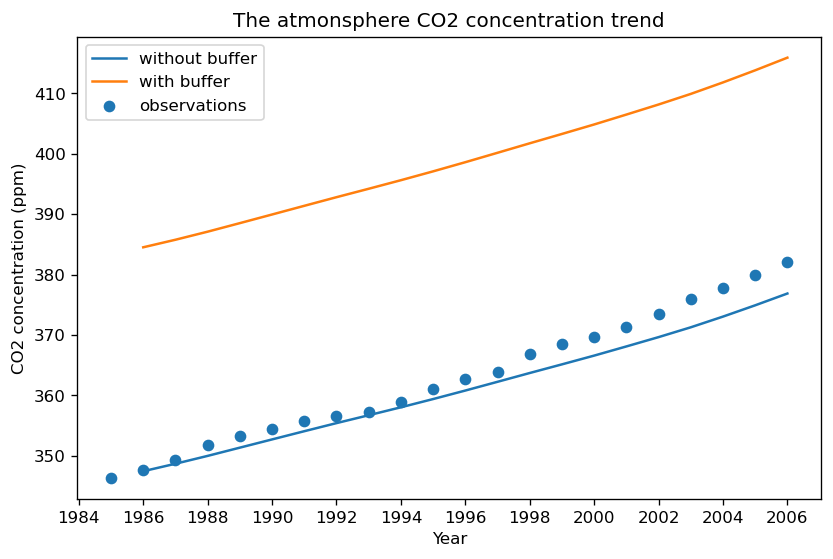

In [7]:
t = np.arange(1986,2007,1)
buffer = 0.97
P1 = odeint(Without_buffer,(740,900),t,args = ([105/740,102/900,splgamma],))[:,0]/2.13
P2 = odeint(With_buffer,(740+79,900-79),t,args = ([105/(740+79) ,102/(900-79) ,splgamma, buffer,821],))[:,0]/2.13

# Draw plot
fig, ax = plt.subplots(1,1, figsize=(8,5), dpi=120)
ax.plot(t,P1,label = 'without buffer')
ax.plot(t,P2,label = 'with buffer')
ax.scatter(obs['year'], obs['mean'], label = 'observations')
ax.set_title('The atmonsphere CO2 concentration trend')
ax.set_ylabel('CO2 concentration (ppm)')
ax.set_xlabel('Year')
ax.legend()

# every two years
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=2))